### Import

In [1]:
import os

In [2]:
import numpy as np
import pandas as np

In [3]:
import matplotlib.pyplot as plt
%matplotlib inline

In [4]:
from IPython.display import display
from PIL import Image

In [7]:
from tensorflow.keras.utils import to_categorical
from keras.applications.vgg16 import VGG16
from keras.models import Model
from keras.layers import Dense
from keras.layers import Flatten
from tensorflow.keras.optimizers import SGD
from keras.preprocessing.image import ImageDataGenerator

### Data preparation

In [8]:
# dimensions of our images.
img_width, img_height = 224, 224

In [11]:
epochs = 20
batch_size = 16

In [12]:
DATA_PATH = 'data'

In [13]:
train_data_dir = os.path.join(DATA_PATH, 'train')
validation_data_dir = os.path.join(DATA_PATH, 'validation')
test_data_dir = os.path.join(DATA_PATH, 'test')

nb_train_samples = len(os.listdir(os.path.join(DATA_PATH, 'train/dog'))) + len(os.listdir(os.path.join(DATA_PATH, 'train/cat')))
nb_validation_samples = len(os.listdir(os.path.join(DATA_PATH, 'validation/dog'))) + len(os.listdir(os.path.join(DATA_PATH, 'validation/cat')))

In [15]:
import tensorflow.keras.backend as K
if K.image_data_format() == 'channels_first':
    input_shape = (3, img_width, img_height)
else:
    input_shape = (img_width, img_height, 3)

In [16]:
train_datagen = ImageDataGenerator(
    rescale=1. / 255,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True)

In [17]:
test_datagen = ImageDataGenerator(rescale=1. / 255)

In [18]:
train_generator = train_datagen.flow_from_directory(
    train_data_dir,
    target_size=(img_width, img_height),
    batch_size=batch_size,
    class_mode='binary')

Found 20000 images belonging to 2 classes.


In [19]:
validation_generator = test_datagen.flow_from_directory(
    validation_data_dir,
    target_size=(img_width, img_height),
    batch_size=batch_size,
    class_mode='binary')

Found 2500 images belonging to 2 classes.


In [20]:
test_generator = test_datagen.flow_from_directory(
    test_data_dir,
    target_size=(img_width, img_height),
    batch_size=batch_size,
    class_mode='binary')

Found 2500 images belonging to 2 classes.


### Define model

In [21]:
# define cnn model
def define_model():
    # load model
    model = VGG16(include_top=False, input_shape=(224, 224, 3))
    # mark loaded layers as not trainable
    for layer in model.layers:
        layer.trainable = False
    # add new classifier layers
    flat1 = Flatten()(model.layers[-1].output)
    class1 = Dense(128, activation='relu', kernel_initializer='he_uniform')(flat1)
    output = Dense(1, activation='sigmoid')(class1)
    # define new model
    model = Model(inputs=model.inputs, outputs=output)
    # compile model
    opt = SGD(lr=0.001, momentum=0.9)
    model.compile(optimizer=opt, loss='binary_crossentropy', metrics=['accuracy'])
    return model

In [22]:
model = define_model()

2021-11-14 01:48:28.847022: I tensorflow/core/platform/cpu_feature_guard.cc:151] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


58900480/58889256 [==============================] - 2s 0us/step


/Users/u6104617/.pyenv/versions/3.8.12/envs/cv-env/lib/python3.8/site-packages/keras/optimizer_v2/gradient_descent.py:102: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(SGD, self).__init__(name, **kwargs)


In [23]:
model.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 224, 224, 3)]     0         
                                                                 
 block1_conv1 (Conv2D)       (None, 224, 224, 64)      1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 224, 224, 64)      36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 112, 112, 64)      0         
                                                                 
 block2_conv1 (Conv2D)       (None, 112, 112, 128)     73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 112, 112, 128)     147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, 56, 56, 128)       0     

In [24]:
history = model.fit_generator(
    train_generator,
    steps_per_epoch=nb_train_samples // batch_size,
    epochs=epochs,
    validation_data=validation_generator,
    validation_steps=nb_validation_samples // batch_size)

/var/folders/2x/6b0z8df95zx4kcymdzxw3tt40000gp/T/ipykernel_95246/818546861.py:1: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  history = model.fit_generator(


Epoch 1/20
1250/1250 [==============================] - 2518s 2s/step - loss: 0.3162 - accuracy: 0.8566 - val_loss: 0.2556 - val_accuracy: 0.8850
Epoch 2/20
1250/1250 [==============================] - 2388s 2s/step - loss: 0.2388 - accuracy: 0.8986 - val_loss: 0.2165 - val_accuracy: 0.9054
Epoch 3/20
1250/1250 [==============================] - 2393s 2s/step - loss: 0.2121 - accuracy: 0.9114 - val_loss: 0.2142 - val_accuracy: 0.9050
Epoch 4/20
1250/1250 [==============================] - 2391s 2s/step - loss: 0.2075 - accuracy: 0.9123 - val_loss: 0.1917 - val_accuracy: 0.9147
Epoch 5/20
1250/1250 [==============================] - 2403s 2s/step - loss: 0.1922 - accuracy: 0.9212 - val_loss: 0.1750 - val_accuracy: 0.9283
Epoch 6/20
1250/1250 [==============================] - 2411s 2s/step - loss: 0.1859 - accuracy: 0.9230 - val_loss: 0.1587 - val_accuracy: 0.9347
Epoch 7/20
1250/1250 [==============================] - 2460s 2s/step - loss: 0.1803 - accuracy: 0.9259 - val_loss: 0.1583 -

### Model evaluation

In [25]:
STEP_SIZE_TEST = test_generator.n // test_generator.batch_size
scores = model.evaluate_generator(test_generator, steps=STEP_SIZE_TEST)
print("\n%s: %.2f%%" % (model.metrics_names[1], scores[1]*100))

/var/folders/2x/6b0z8df95zx4kcymdzxw3tt40000gp/T/ipykernel_95246/4180287993.py:2: UserWarning: `Model.evaluate_generator` is deprecated and will be removed in a future version. Please use `Model.evaluate`, which supports generators.
  scores = model.evaluate_generator(test_generator, steps=STEP_SIZE_TEST)



accuracy: 93.51%


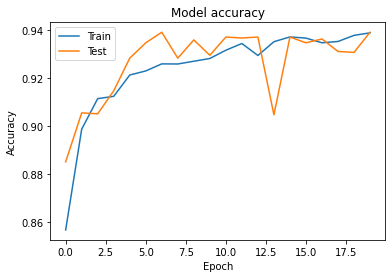

In [26]:
# Plot training & validation accuracy values
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

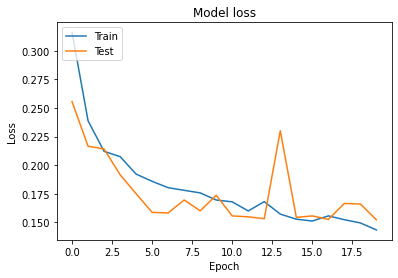

In [27]:
# Plot training & validation loss values
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

In [28]:
if not os.path.exists(os.path.join(DATA_PATH, 'model')):
    os.makedirs(os.path.join(DATA_PATH, 'model'))
model.save(os.path.join(DATA_PATH, 'model/keras_vgg16_model'))

2021-11-15 08:51:49.988035: W tensorflow/python/util/util.cc:368] Sets are not currently considered sequences, but this may change in the future, so consider avoiding using them.


INFO:tensorflow:Assets written to: data/model/keras_vgg16_model/assets
